In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_excel('sample.xlsx')
print(data.shape)
print(list(data.columns))

(861, 26)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 'PD']


In [3]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,PD
0,1905000388,60000,24,20,0.5,No,NaN,0,2,0,...,0,0,1,100,3,3363.61,1,3514.0,6979.0,0
1,1903001501,15000,12,25,0.5,No,NaN,0,2,0,...,2,0,1,100,3,1511.67,1,3512.0,10200.0,0
2,1903003784,20000,12,25,0.5,No,NaN,1,0,0,...,16,0,1,100,3,2007.47,2,3512.0,11700.0,0
3,1803004211,50000,24,25,0.5,No,NaN,0,2,0,...,261,134,1,100,4,2937.38,5,9080.0,13048.0,1
4,1906000031,70000,24,20,0.5,No,NaN,0,2,0,...,0,0,1,100,0,3939.78,1,3923.0,6168.0,0


In [4]:
del data[1]     # Удаляем столбец 1 и 7
del data[7]

In [5]:
data = data.dropna()   # Удаляем Nan

In [6]:
data[6] = data[6].map({'Yes': 1, 'No': 0})  # Меняем Yes и No на 1 и 0

In [7]:
data.head()

,2,3,4,5,6,8,9,10,11,12,...,17,18,19,20,21,22,23,24,25,PD
0,60000,24,20,0.5,0,0,2,0,0,34.1928,...,0,0,1,100,3,3363.61,1,3514.0,6979.0,0
1,15000,12,25,0.5,0,0,2,0,0,43.8648,...,2,0,1,100,3,1511.67,1,3512.0,10200.0,0
2,20000,12,25,0.5,0,1,0,0,0,43.0428,...,16,0,1,100,3,2007.47,2,3512.0,11700.0,0
3,50000,24,25,0.5,0,0,2,0,1,39.4260,...,261,134,1,100,4,2937.38,5,9080.0,13048.0,1
4,70000,24,20,0.5,0,0,2,0,1,34.6308,...,0,0,1,100,0,3939.78,1,3923.0,6168.0,0


In [8]:
data['PD'].value_counts()   # Классы несбалансированые

0    552
1    146
Name: PD, dtype: int64

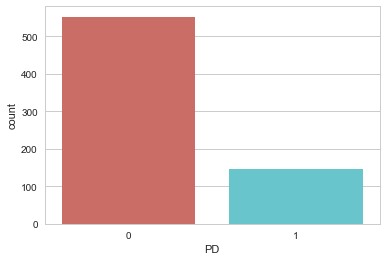

In [9]:
sns.countplot(x='PD',data=data, palette='hls')
plt.show()

In [10]:
count_no_approved = len(data[data['PD']==0])       # Процентное соотношение классов
count_approved = len(data[data['PD']==1])
pct_of_no_approved = count_no_approved/(count_no_approved+count_approved)
print("percentage of no approved is", pct_of_no_approved*100)
pct_of_approved = count_approved/(count_no_approved+count_approved)
print("percentage of approved", pct_of_approved*100)

percentage of no approved is 79.08309455587393
percentage of approved 20.916905444126073


#### Отбор признаков

Text(0,0.5,'Share of approvals')

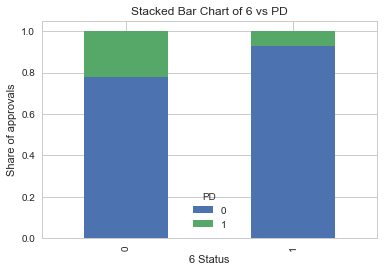

In [11]:
table=pd.crosstab(data[6],data.PD)    # проверка 6   
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of 6 vs PD')
plt.xlabel('6 Status')
plt.ylabel('Share of approvals')

Text(0,0.5,'Share of approvals')

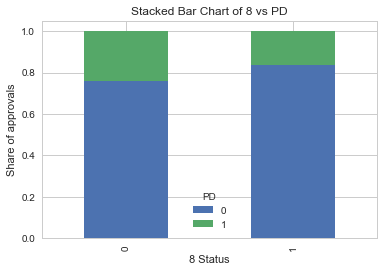

In [12]:
table=pd.crosstab(data[8],data.PD)    # проверка 8   
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of 8 vs PD')
plt.xlabel('8 Status')
plt.ylabel('Share of approvals')

Text(0,0.5,'Share of approvals')

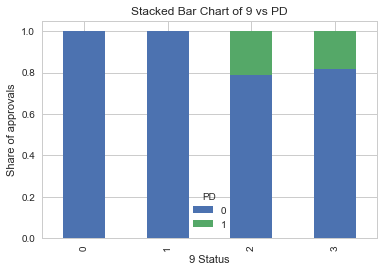

In [13]:
table=pd.crosstab(data[9],data.PD)    # проверка 9   
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of 9 vs PD')
plt.xlabel('9 Status')
plt.ylabel('Share of approvals')

Text(0,0.5,'Share of approvals')

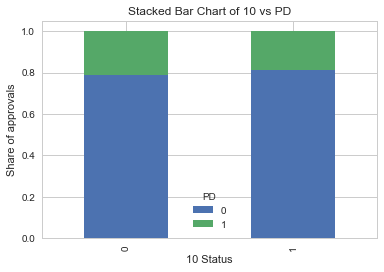

In [14]:
table=pd.crosstab(data[10],data.PD)    # проверка 10     
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of 10 vs PD')
plt.xlabel('10 Status')
plt.ylabel('Share of approvals')

Text(0,0.5,'Share of approvals')

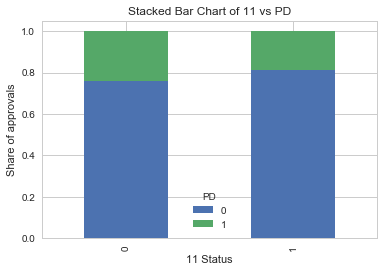

In [15]:
table=pd.crosstab(data[11],data.PD)    # проверка 11  
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of 11 vs PD')
plt.xlabel('11 Status')
plt.ylabel('Share of approvals')

Text(0,0.5,'Share of approvals')

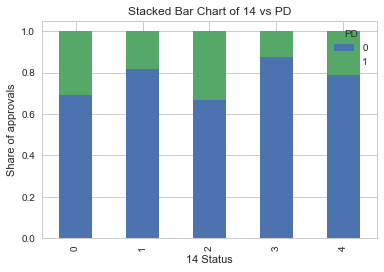

In [16]:
table=pd.crosstab(data[14],data.PD)    # проверка 14    
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of 14 vs PD')
plt.xlabel('14 Status')
plt.ylabel('Share of approvals')

Text(0,0.5,'Share of approvals')

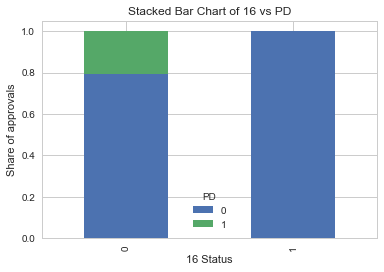

In [17]:
table=pd.crosstab(data[16],data.PD)    # проверка 16    
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of 16 vs PD')
plt.xlabel('16 Status')
plt.ylabel('Share of approvals')

Text(0,0.5,'Share of approvals')

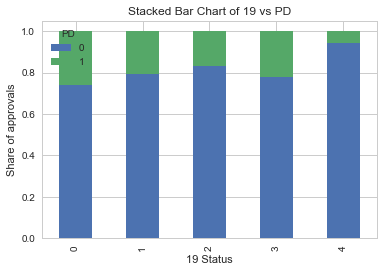

In [18]:
table=pd.crosstab(data[19],data.PD)    # проверка 19    
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of 19 vs PD')
plt.xlabel('19 Status')
plt.ylabel('Share of approvals')

Text(0,0.5,'Share of approvals')

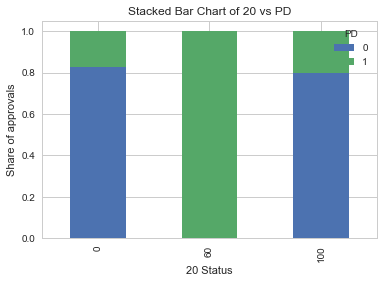

In [19]:
table=pd.crosstab(data[20],data.PD)    # проверка 20      
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of 20 vs PD')
plt.xlabel('20 Status')
plt.ylabel('Share of approvals')

In [20]:
data[20].value_counts()

100    669
0       23
60       6
Name: 20, dtype: int64

Text(0,0.5,'Share of approvals')

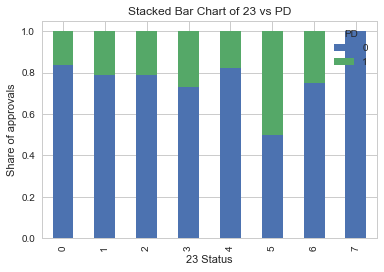

In [21]:
table=pd.crosstab(data[23],data.PD)    # проверка 23         
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of 23 vs PD')
plt.xlabel('23 Status')
plt.ylabel('Share of approvals')

#### Over-Sampling

In [22]:
X = data.loc[:, data.columns != 'PD']
y = data.loc[:, data.columns == 'PD']

In [23]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['PD'])
print("length of oversampled data is ",len(os_data_X))
print("Number of no approved in oversampled data",len(os_data_y[os_data_y['PD']==0]))
print("Number of approved",len(os_data_y[os_data_y['PD']==1]))
print("Proportion of no approved data in oversampled data is ",len(os_data_y[os_data_y['PD']==0])/len(os_data_X))
print("Proportion of approved data in oversampled data is ",len(os_data_y[os_data_y['PD']==1])/len(os_data_X))

length of oversampled data is  986
Number of no approved in oversampled data 493
Number of approved 493
Proportion of no approved data in oversampled data is  0.5
Proportion of approved data in oversampled data is  0.5


#### Рекурсивное устранение признаков

In [34]:
data_final_vars=data.columns.values.tolist()
y=['PD']
X=[i for i in data_final_vars if i not in y]

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)

rfe = RFE(logreg, n_features_to_select=21, step=1)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True False]
[1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 3]


In [25]:
cols = [8, 9, 11, 14, 19, 21, 22] # 78
X=os_data_X[cols]
y=os_data_y['PD']

#### Матрица корреляции

In [26]:
pd.options.display.max_columns = 30
data.corr()

,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,PD
2,1.000000,0.284586,-0.747639,-0.059917,0.025895,-0.206549,0.018787,0.099972,0.082542,-0.649132,-0.104693,-0.110881,0.032096,0.132285,0.037099,0.032926,-0.009362,-0.084186,-0.065185,0.444080,0.025678,0.171285,0.306649,0.050090
3,0.284586,1.000000,-0.198170,-0.048022,-0.442558,-0.144355,0.142673,-0.174134,-0.155721,-0.443015,-0.138990,-0.055319,0.040947,0.021576,0.138293,0.099297,-0.153135,0.023804,0.057197,-0.337862,0.094037,-0.121336,-0.251279,0.134092
4,-0.747639,-0.198170,1.000000,0.084051,-0.039813,-0.019272,-0.006168,-0.073245,-0.014027,0.763754,0.057506,0.056358,-0.015648,-0.111022,-0.001784,-0.033206,-0.047891,0.057875,0.046032,-0.364399,-0.097660,-0.135432,-0.269328,-0.022670
5,-0.059917,-0.048022,0.084051,1.000000,0.019245,-0.080333,-0.002635,0.009981,0.075938,0.119433,0.323527,-0.094998,0.076610,0.002468,-0.001636,-0.011024,-0.033741,-0.013053,0.017628,-0.004054,0.004158,-0.003658,-0.007072,-0.024748
6,0.025895,-0.442558,-0.039813,0.019245,1.000000,0.019150,-0.136919,0.201446,0.168057,-0.163938,0.027066,-0.120591,0.187089,-0.011187,-0.097495,-0.046930,0.153969,0.059160,-0.037676,0.431809,0.002795,0.216842,0.279320,-0.100022
8,-0.206549,-0.144355,-0.019272,-0.080333,0.019150,1.000000,0.020993,-0.065541,0.008693,0.098951,0.017327,0.187957,-0.111096,-0.030724,-0.079570,-0.052770,0.052587,0.162482,0.036424,-0.086724,0.051152,-0.008822,0.055308,-0.093166
9,0.018787,0.142673,-0.006168,-0.002635,-0.136919,0.020993,1.000000,-0.186810,0.000368,-0.035010,-0.003706,0.030056,0.012427,0.001532,0.054820,0.008592,-0.072795,-0.103499,0.002966,-0.168652,-0.058213,-0.049815,-0.127533,0.049204
10,0.099972,-0.174134,-0.073245,0.009981,0.201446,-0.065541,-0.186810,1.000000,0.034579,-0.082725,0.014037,-0.090940,0.013895,-0.005802,-0.016410,-0.022233,0.057592,-0.022014,-0.036151,0.369626,0.082098,0.308546,0.273082,-0.008161
11,0.082542,-0.155721,-0.014027,0.075938,0.168057,0.008693,0.000368,0.034579,1.000000,0.010542,0.034236,-0.248893,0.274598,0.032502,-0.061034,-0.055990,0.125597,-0.015500,-0.145206,0.122562,-0.002994,-0.009982,0.096772,-0.064762
12,-0.649132,-0.443015,0.763754,0.119433,-0.163938,0.098951,-0.035010,-0.082725,0.010542,1.000000,0.140749,0.126100,-0.145677,-0.069452,-0.011634,-0.039276,-0.023463,0.001052,0.011732,-0.308220,-0.169332,-0.153747,-0.189809,-0.035368


 #### Реализация модели

In [27]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.581788
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.161     
Dependent Variable: PD               AIC:              1161.2858 
Date:               2020-12-14 11:18 BIC:              1195.5414 
No. Observations:   986              Log-Likelihood:   -573.64   
Df Model:           6                LL-Null:          -683.44   
Df Residuals:       979              LLR p-value:      1.2661e-44
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
8     -1.4801      0.1733    -8.5385    0.0000    -1.8198    -1.1403
9      1.0621      0.1124     9.4495    0.0000     0.8

D:\Python\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


#### Подгонка модели логистической регрессии

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

#### Прогнозирование

In [29]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


#### Матрица ошибок

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[42  8]
 [14 35]]


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        50
           1       0.81      0.71      0.76        49

    accuracy                           0.78        99
   macro avg       0.78      0.78      0.78        99
weighted avg       0.78      0.78      0.78        99



#### ROC-кривая

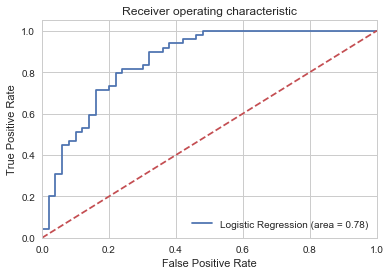

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()